1. Data Overview and Cleaning1. Data Overview and Cleaning

a. Key Characteristics of the Dataset

In [69]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Weather Data.csv')

# Display key characteristics of the dataset
print("Dataset Overview:")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print(f"Feature names: {df.columns.tolist()}")
print(f"Data types:\n{df.dtypes}")
print(f"First few records:\n{df.head()}")


Dataset Overview:
Number of records: 8784
Number of features: 8
Feature names: ['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather']
Data types:
Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object
First few records:
       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24           

b. Handle Missing or Null Values

In [70]:
# Check for missing or null values
print("Missing values:\n", df.isnull().sum())

# Handle missing values: here we'll fill missing values with the mean or median depending on the feature
df.fillna(df.mean(numeric_only=True), inplace=True)

# Verify that missing values have been handled
print("Missing values after handling:\n", df.isnull().sum())


Missing values:
 Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64
Missing values after handling:
 Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


c. Check for and Address Duplicate Records

In [71]:
# Check for duplicate records
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

# Drop duplicate records if any
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate records removed.")


Number of duplicate records: 0


2. Statistical Summary
a. Provide Statistical Summary

In [72]:
# Statistical summary of numerical features
print("Statistical summary:\n", df.describe())


Statistical summary:
             Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  


b. Identify Significant Outliers

In [73]:
# Identify outliers using the IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers

# Identify outliers in numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
for column in numerical_columns:
    outliers = identify_outliers(df, column)
    print(f"Number of outliers in {column}: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[[column]].head())


Number of outliers in Temp_C: 0
Number of outliers in Dew Point Temp_C: 0
Number of outliers in Rel Hum_%: 2
      Rel Hum_%
1984         18
3066         18
Number of outliers in Wind Speed_km/h: 162
    Wind Speed_km/h
25               39
32               39
33               44
34               43
36               48
Number of outliers in Visibility_km: 3539
   Visibility_km
0            8.0
1            8.0
2            4.0
3            4.0
4            4.8
Number of outliers in Press_kPa: 207
     Press_kPa
294      98.94
295      98.84
296      98.69
297      98.56
298      98.44


3. Data Visualization
a. Distribution of Key Weather Parameters

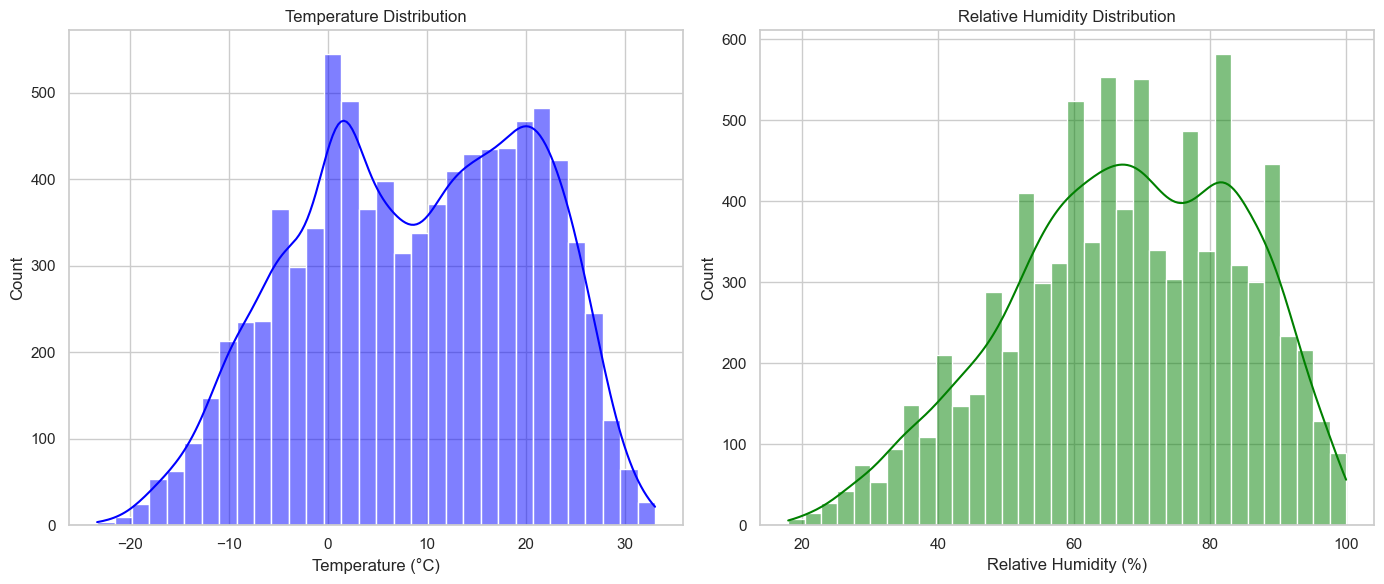

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data from a CSV file
df = pd.read_csv('Weather Data.csv')

# Convert 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Optionally, set 'Date/Time' as the index
# df.set_index('Date/Time', inplace=True)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot distribution of Temperature
sns.histplot(df['Temp_C'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Temperature Distribution')
axes[0].set_xlabel('Temperature (°C)')

# Plot distribution of Relative Humidity
sns.histplot(df['Rel Hum_%'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Relative Humidity Distribution')
axes[1].set_xlabel('Relative Humidity (%)')

plt.tight_layout()
plt.show()


b. Time Series Graphs

In [75]:
# Convert 'Date' column to datetime format if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Plot time series for Temperature, Humidity, and Wind Speed
    plt.figure(figsize=(14, 8))

    plt.plot(df.index, df['Temperature'], label='Temperature', color='blue')
    plt.plot(df.index, df['Relative Humidity'], label='Relative Humidity', color='green')
    plt.plot(df.index, df['Wind Speed_km/h'], label='Wind Speed', color='red')

    plt.title('Weather Parameters Over Time')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()


c. Correlation Matrix and Heatmap

Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object


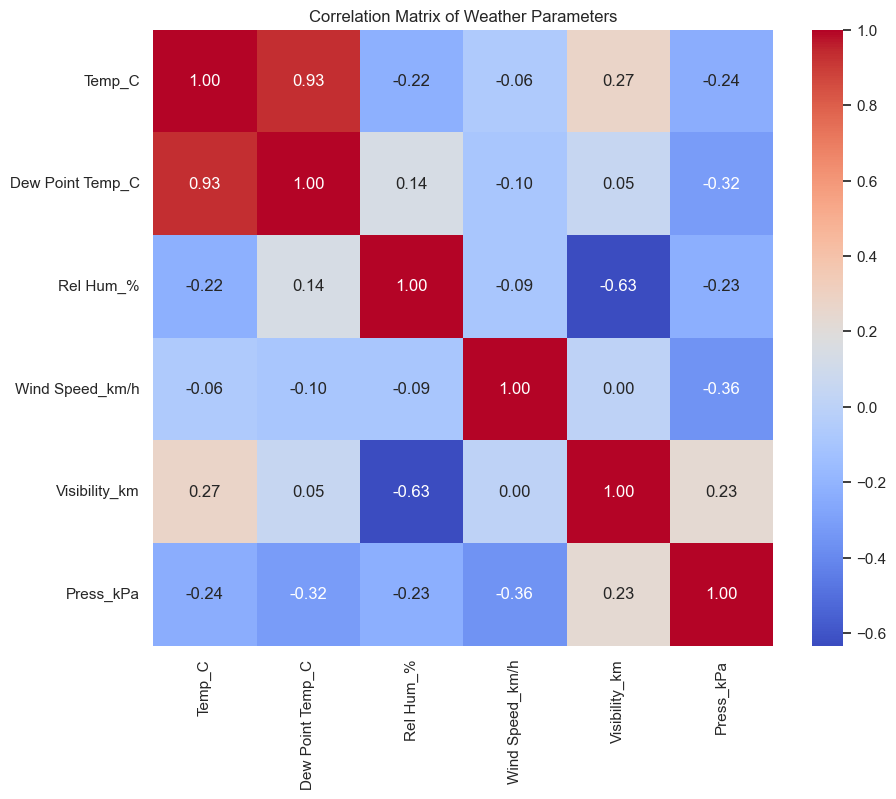

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (example: df = pd.read_csv('your_file.csv'))
# df = pd.read_csv('path_to_your_data.csv')

# Print data types to identify non-numeric columns
print(df.dtypes)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weather Parameters')
plt.show()


4. Weather Patterns and Trends
a. Analyze Trends and Patterns

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Print the first few rows and column names to check the data
print(df.head())
print(df.columns)

# Assuming 'Date' is the actual name of the column with date data
# Check if 'Date' column exists in the DataFrame
if 'Date' in df.columns:
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' column as the index
    df.set_index('Date', inplace=True)

    # Resample data to monthly frequency and calculate mean values
    monthly_data = df.resample('M').mean()

    # Plot monthly trends for Temperature, Humidity, and Wind Speed
    plt.figure(figsize=(14, 8))

    plt.plot(monthly_data.index, monthly_data['Temperature'], label='Monthly Average Temperature', color='blue')
    plt.plot(monthly_data.index, monthly_data['Relative Humidity'], label='Monthly Average Relative Humidity', color='green')
    plt.plot(monthly_data.index, monthly_data['Wind Speed_km/h'], label='Monthly Average Wind Speed', color='red')

    plt.title('Monthly Weather Trends')
    plt.xlabel('Month')
    plt.ylabel('Average Values')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Column 'Date' does not exist in the DataFrame.")


            Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0 2012-01-01 00:00:00    -1.8              -3.9         86                4   
1 2012-01-01 01:00:00    -1.8              -3.7         87                4   
2 2012-01-01 02:00:00    -1.8              -3.4         89                7   
3 2012-01-01 03:00:00    -1.5              -3.2         88                6   
4 2012-01-01 04:00:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  
Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')
Column 'Date' does not exist in the DataFrame.


b. Investigate Anomalies

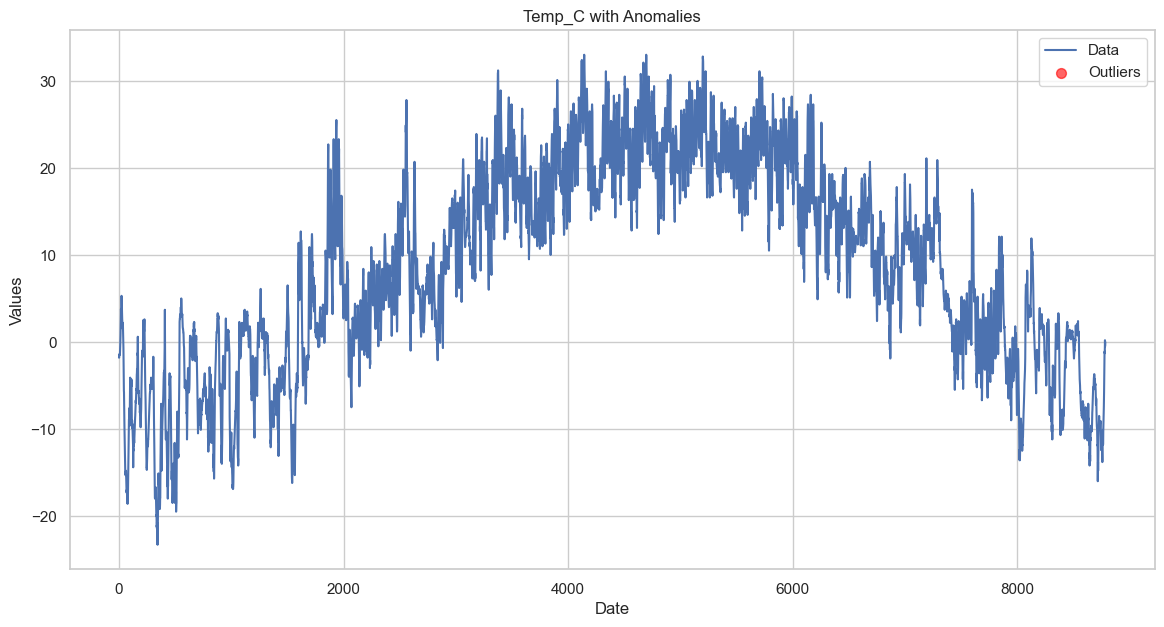

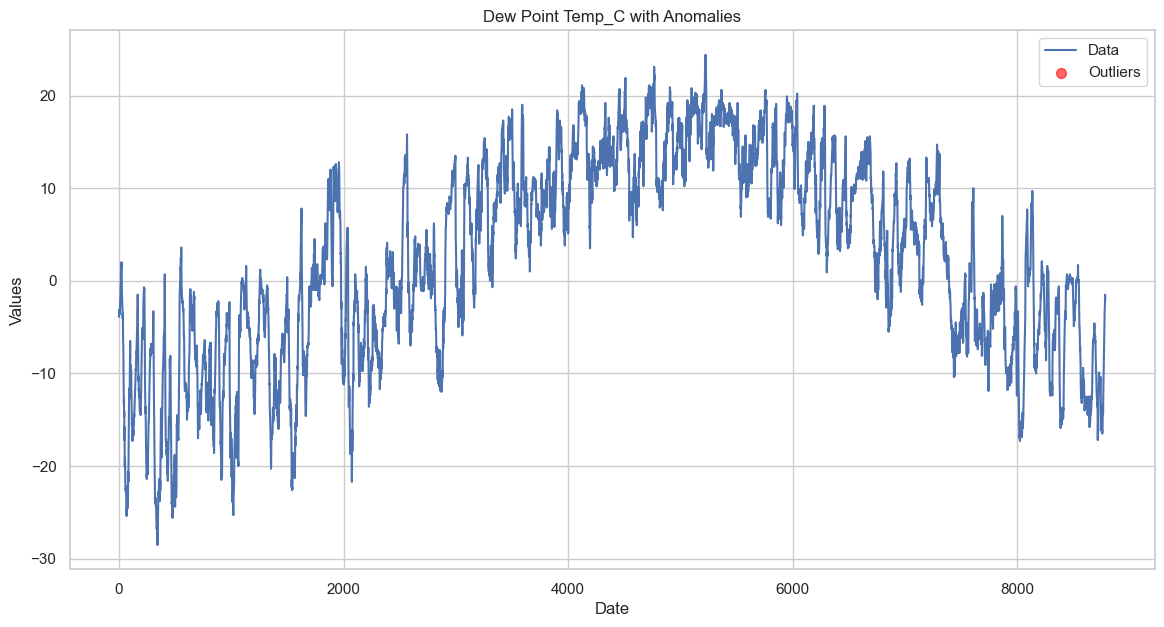

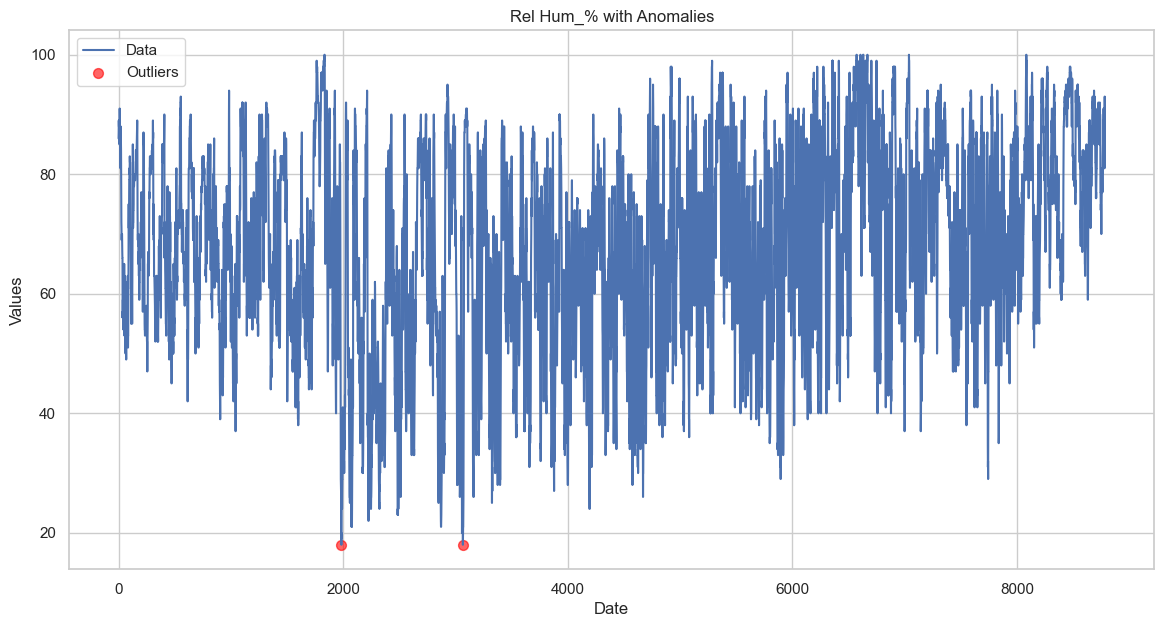

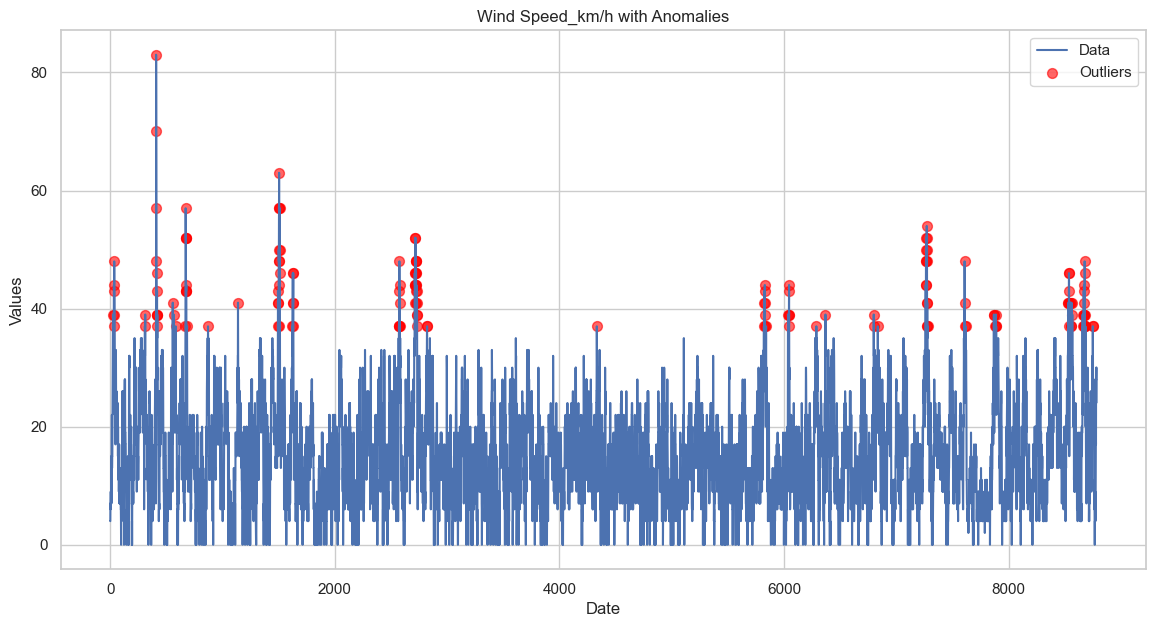

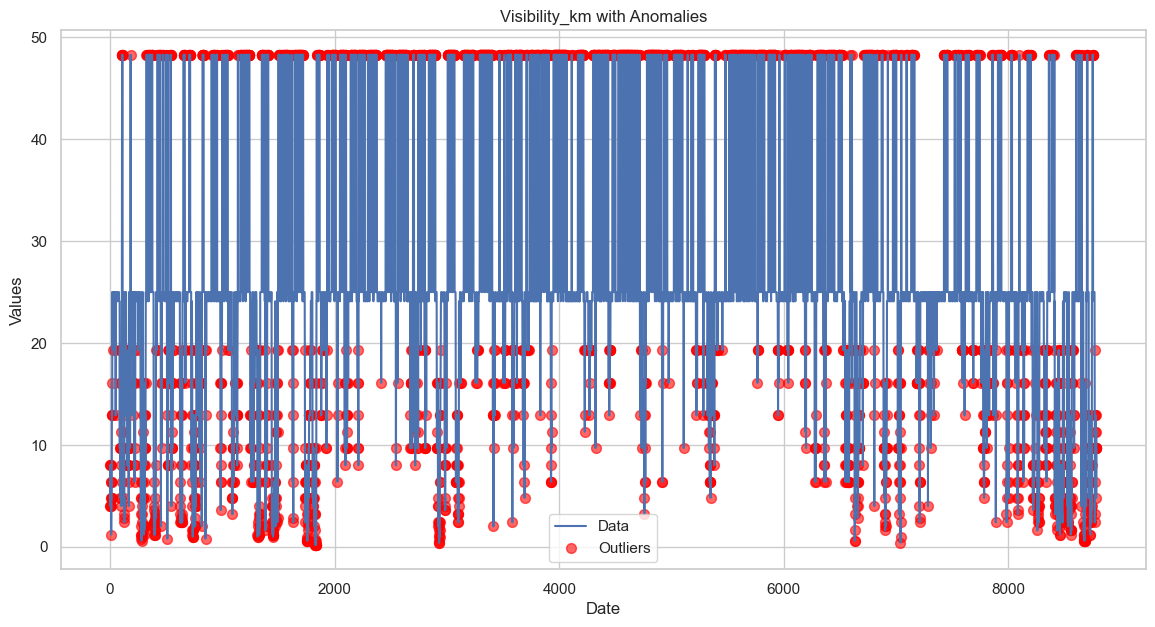

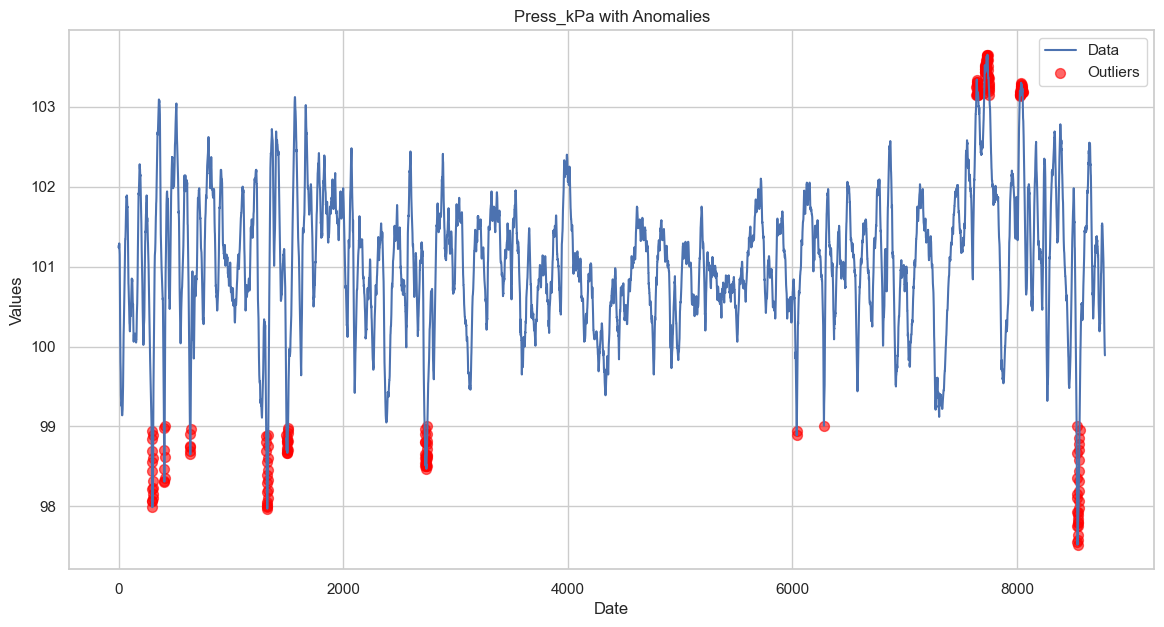

In [78]:
# Identify anomalies by plotting data points that fall outside 1.5*IQR range
def plot_anomalies(df, column):
    outliers = identify_outliers(df, column)
    
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df[column], label='Data')
    plt.scatter(outliers.index, outliers[column], color='red', label='Outliers', s=50, alpha=0.6)
    plt.title(f'{column} with Anomalies')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot anomalies for key columns
for column in numerical_columns:
    if column in df.columns:
        plot_anomalies(df, column)
